In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [ ]:
# Read the CSV file into a dataframe
df = pd.read_csv('/content/drive/MyDrive/dga_dataset/my_dataframe.csv')
# Print the dataframe
print(df)

                                 domTLD                          domSLD  Ldom  \
0        784576782338916054467626849318  488496392775427878672438958169    15   
1        488496392775427878672438958169  788742948622623196738432192695    27   
2        488496392775427878672438958169  277262778974965566144345488573    14   
3        595697130768765306372839937235  567159546015580566726214957187    20   
4        488496392775427878672438958169  820354899519846715130356772207    25   
...                                 ...                             ...   ...   
1675995  770962937163670966920804908886  693534505500203517100940412029    20   
1675996  164890544466941896389037254793  659887864416143826711127047818    20   
1675997  387319368860765981107521995255  488496392775427878672438958169    16   
1675998  831129081358710935031236283788  788858231868992874137917364688    13   
1675999  488496392775427878672438958169  329118678273645425701599998126    11   

         LTLD  LSLD  LOLD  

In [ ]:
y = df[['label']].values
del df['label']
X = df.values

In [ ]:
print(type(X[5,1]))
print(X[:5,:])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])
X[:, 1] = label_encoder.fit_transform(X[:, 1])
print(type(X[5,1]))
print(X[:5,:])
#print(y)

<class 'str'>
[['784576782338916054467626849318' '488496392775427878672438958169' 15 2
  3 8 3 0 0 2 1 8 0 1.2857142857142858 1.0 4.333333333333333 0.0 1 0 6 0
  6 3 9 0 1 0.2857142857142857 0.6 0.3461538461538461 0.0 0.5 0.6
  0.2666666666666666 0.8666666666666667 0.0 0.1333333333333333]
 ['488496392775427878672438958169' '788742948622623196738432192695' 27 3
  23 0 2 0 0 4 1 23 0 2.0 1.0 13.0 0.0 3 0 20 0 10 4 14 0 1
  0.4761904761904761 0.8 0.5384615384615384 0.0 0.5 0.6666666666666666
  0.2962962962962963 0.9629629629629628 0.0 0.037037037037037]
 ['488496392775427878672438958169' '277262778974965566144345488573' 14 3
  10 0 2 0 0 10 1 10 0 4.0 1.0 6.5 0.0 9 0 7 0 9 1 10 0 1
  0.4285714285714285 0.2 0.3846153846153846 0.0 0.5 0.8571428571428571
  0.0714285714285714 0.9285714285714286 0.0 0.0714285714285714]
 ['595697130768765306372839937235' '567159546015580566726214957187' 20 3
  16 0 2 0 0 8 1 16 0 3.75 1.0 9.5 0.0 7 0 13 0 8 3 11 0 1
  0.3809523809523809 0.6 0.4230769230769231 0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your dataset
scaler.fit(X)

# Transform your dataset using the scaler
X_norm = scaler.transform(X)

In [ ]:
print(type(X_norm[5,1]))
print(X_norm[:5,:])
print(y)


<class 'numpy.float64'>
[[0.76081425 0.43152494 0.15942029 0.         0.03225806 0.13333333
  0.33333333 0.         0.         0.03174603 0.05       0.09836066
  0.         0.05934066 0.0952381  0.10216257 0.         0.01612903
  0.         0.1        0.         0.3        0.6        0.33333333
  0.         0.         0.3        0.6        0.33333333 0.
  0.         0.61846154 0.3047619  0.86815992 0.         0.25197305]
 [0.43256997 0.76506818 0.33333333 0.07692308 0.35483871 0.
  0.         0.         0.         0.06349206 0.05       0.3442623
  0.         0.09230769 0.0952381  0.37360179 0.         0.0483871
  0.         0.33333333 0.         0.5        0.8        0.54166667
  0.         0.         0.5        0.8        0.54166667 0.
  0.         0.68717949 0.33862434 0.97538    0.         0.04705379]
 [0.43256997 0.19687158 0.14492754 0.07692308 0.14516129 0.
  0.         0.         0.         0.15873016 0.05       0.13114754
  0.         0.18461538 0.0952381  0.17002237 0.        

In [ ]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_norm, y, stratify=y, train_size=0.75,random_state=42)

input_shape = [X_train.shape[1]]
print(input_shape)

[36]


### Define the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 36)               144       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               9472      
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

### Add Optimizer, Loss, and Metric

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
2456/2456 [==============================] - 29s 8ms/step - loss: 0.3356 - binary_accuracy: 0.8525 - val_loss: 0.2956 - val_binary_accuracy: 0.8728
Epoch 2/200
2456/2456 [==============================] - 18s 8ms/step - loss: 0.3036 - binary_accuracy: 0.8677 - val_loss: 0.2817 - val_binary_accuracy: 0.8773
Epoch 3/200
2456/2456 [==============================] - 21s 8ms/step - loss: 0.2954 - binary_accuracy: 0.8713 - val_loss: 0.2762 - val_binary_accuracy: 0.8795
Epoch 4/200
2456/2456 [==============================] - 18s 7ms/step - loss: 0.2905 - binary_accuracy: 0.8731 - val_loss: 0.2721 - val_binary_accuracy: 0.8817
Epoch 5/200
2456/2456 [==============================] - 18s 7ms/step - loss: 0.2874 - binary_accuracy: 0.8748 - val_loss: 0.2717 - val_binary_accuracy: 0.8819
Epoch 6/200
2456/2456 [==============================] - 19s 8ms/step - loss: 0.2852 - binary_accuracy: 0.8758 - val_loss: 0.2682 - val_binary_accuracy: 0.8831
Epoch 7/200
2456/2456 [=================

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the test data X_test and corresponding labels y_test
# Predict probabilities for the test data
y_pred_prob = model.predict(X_valid)

# Convert probabilities to binary labels using a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert predictions and ground truth labels to flat lists
y_pred_flat = y_pred.flatten()
y_test_flat = y_valid.flatten()

# Calculate the metrics
accuracy = accuracy_score(y_test_flat, y_pred_flat)
precision = precision_score(y_test_flat, y_pred_flat)
recall = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


13094/13094 [==============================] - 25s 2ms/step
Accuracy: 0.8869474940334129
Precision: 0.9106997448564139
Recall: 0.8225859175801425
F1-score: 0.8644031408067282


<Axes: title={'center': 'Accuracy'}>

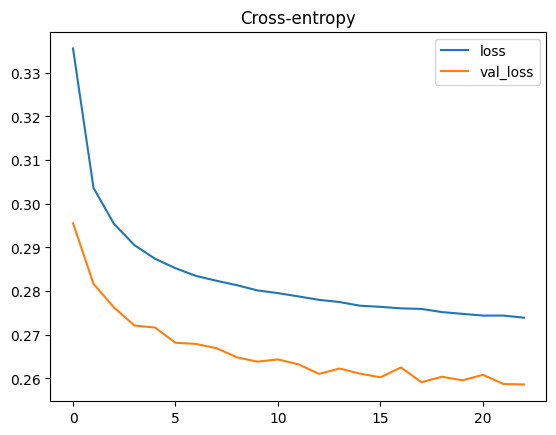

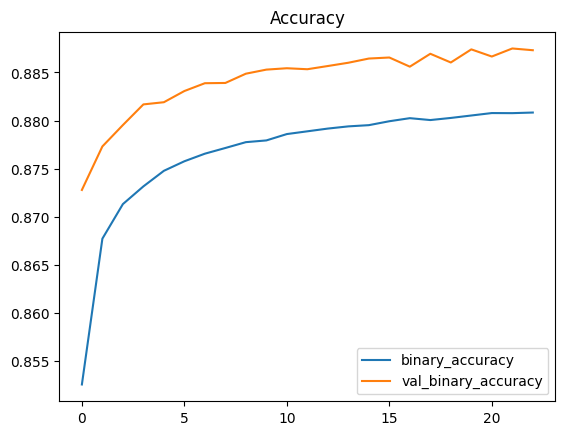

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")